## Machine Learning
통계 기법이나 알고리즘을 통해 데이터에 숨겨진 패턴을 찾아내거나 분류, 예측하는 것. 사람이 처리하기 어려운 대규모 데이터 처리, 사람이 발견하지 못한 패턴 발견, 사람이 저지르기 쉬운 bias 줄일 수 있음

- Supervised Learning
입력에 대한 결과 값이 있는 경우.\
>Naive Bayesian, Decision Tree, 회귀분석, Ensembles 등 분류모델

- Unsupervised Learning
출력 값이 주어지지 않은 상태에서 기계 스스로 숨겨진 패턴을 찾아 특징이 유사한 그룹끼리 clustering. 
>KMeans, LDA, SVD, PCA 등의 모델

- Reinforcement Learning 
보상을 통해 학습해 나간다. ex) 알파고
>Marcov decision process

### 기계학습 모델들
- #### Regression Analysis
입력변수를 선형 또는 비선형으로 모델링해서 목표변수를 예측하는 경우에 사용

- #### Clustering
군집의 갯수k를 정하고, 각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당하고, 계속 새로운 중심점을 갱신하여 군집의 오류가 최소화할 때까지 계속

- #### 추천 
인기 많은 영화가 아닌 나에게 맞는 영화 추천, 취향이 유사한 사람들이 좋아하는 제품 추천

- #### Logistic Regression
지도 학습, 이진분류 문제(강제 이진 분류), spark는 이진분류만 가능\
logistic(sigmoid) 함수 사용

>$log\frac{p}{1-p} \in \{1, 0\}$

- #### Support Vector Machine (SVM)
 데이터를 분류하는 모델로서, 데이터가 분포된 공간에서 서로 구분하기 위한 경계 가운데, 가장 큰 폭을 가진 경계를 찾는 알고리즘\
선형 분류, 비선형 분류 둘 다 가능. 

- #### Decision Tree
입력변수를 바탕으로 목표변수를 예측하는 모델, 지도 학습. 데이터 집합을 분할하면서 얼마나 적합한지 측정할 경우 아래 기준을 사용한다.\
Gini impurity entropy로 불확실성을 계산.즉 50-50은 가장 불확실하다,
>$$
\begin{align}
H(S) &amp;= - \sum_{i=1}^{n}\ p_i\ log_2\ p_i\\
     &amp;= - p_1 log_2\ p_1 - p_2 log_2\ p_2\ \ldots
\end{align}$$
정보이득을 계산해서, 가장 높은 속성을 선정하여 분기하게 된다.
>$$
IG(A,S) = H(S) - \sum_{i=1}^m\ p(i)\ H(i)
$$

- #### 나이즈 베이즈 분류
Naive Bayesian은 변수들 사이의 독립을 가정하는 베이즈 정리 Bayes' theorem에 따른 분류 지도학습 방법. 조건부 확률 모델. 

### CLustering

Unsupervised Learning, Decision Tree, kNN.
- Partitioning Clustering 
> k-means 

- Hierarchical clustering

- Density-based Clustering
>DBSCAN

### K-means

군집의 갯수 k를 정하고, 중심점 $C_k$을 정한다. 이 중심점은 반복하면서 갱신하게 된다.
- 반복:
>- 할당 단계: 각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당\
모든 데이터 ${x_1,x_2,\cdots,x_n}\in D$에 대해 반복\
각 데이터 $x_n$에서 각 클러스터 $C_k$ 거리를 계산 $dist(x_n,m_k)=\|x_n-m_k\|$ ($m_k$는 $C_k$ 평균을 말한다)\
$x_n$을 가장 가까운 클러스터 $C_k$에 할당\
>- 갱신 단계:
현재 클러스터에 할당된 데이터로의 평균을 계산하여 새로운 클러스터 $C_k$의 중심점$m_k$를 설정\
>- 종료 단계:
갱신이 더 이상 없으면 종료

In [1]:
#data
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

In [2]:
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)

In [3]:
#할당
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193 #수동계산
    dist = np.linalg.norm(x1 - x2) #36.406001444695193 #numpy 이용
    return dist

In [4]:
#중심점을 2,5와 7,2로 설정하여 첫 번째 x[0]와의 거리 구하기

for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]


In [5]:
#sawp 

minDist = np.inf #무한대
for j in range(k): #중심점에 대해서 반복
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))
    # pick the closest centroid
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print (".....Assigning {} to {}th centroid by {:.3f}".format(x[0], minIndex, minDist))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]
.....Assigning [2. 5.] to 0th centroid by 0.000


In [6]:
#저장소
clusterAssigned = np.zeros(shape = (x.shape[0],2), dtype = float)
print (clusterAssigned)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [7]:
row, c = x.shape
for i in range(row):
    minDist = np.inf   # arbitray max
    minIndex = -1      # arbitray index
    for j in range(k):
        # distance from centroids[j] to x[i]
        distJI = normDist(centroids[j], x[i])
        # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
        # pick the closest centroid
        if distJI < minDist:
            minDist = distJI
            minIndex = j
    print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]   #-----changed

.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000


In [8]:
print (".....Assigned clusters: \n{}".format(clusterAssigned))
#(소속집단index, 거리 )

.....Assigned clusters: 
[[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]


In [9]:
#중심점 갱신

clusterAssigned[:,0] #집단index
x[clusterAssigned[:,0]==0] #=>첫 번째 집단에 속한 점들
x[clusterAssigned[:,0]==1] #=>두 번째 집단에 속한 점들

array([[7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])

In [11]:
_centroids=np.zeros(shape=(k,x.shape[1]), dtype=float)

for cent in range(k): #각 집단에 대해서 중심점 ㄱㅖ산
    _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
print ("Centroids updated: \n", _centroids)

Centroids updated: 
 [[3.  5.5]
 [7.8 3.2]]


In [14]:
#종료

comparison = np.equal(centroids, _centroids)
print(comparison.all()) #중심점이 갱신 되냐고 묻는건데, 
#갱신이 안 된 경우에 True 값 나옴

#np.isclose()는 tolerence를 어느 정도 허용하면서 동일한지 비교
comparison = np.isclose(centroids, _centroids)
print(comparison.all())

False
False


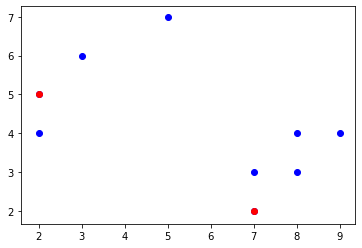

In [15]:
#그래프 표시
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(centroids[:,0],centroids[:,1],color='red')

#### k-mean python 함수로

In [16]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist


def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1
            
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')
    



====== Iteration 1 ======
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000

.....Assigned clusters: 
 [[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]

.....Updating Centroids
 [[2. 5.]
 [7. 2.]] => 
[[3.  5.5]
 [7.8 3.2]]


====== Iteration 2 ======
.....Assigning [2. 5.] to 0th centroid by 1.118
.....Assigning [3. 6.] to 0th centroid by 0.500
.....Assigning [2. 4.] to 0th centroid by 1.803
.....Assigning [5. 7.] to 0th centroid by 2

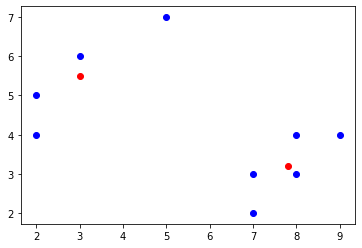

In [17]:
#함수 이용하여 k-means 돌리기 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(x, k, centroids)
draw(x, centroids)